### TEMPLATE MATCHING

En este trabajo práctico se busca la identificación de objetos a través de diferentes algoritmos, entre ellos __template matchin__. 

In [ ]:
#Import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

#%matplotlib


### Ejercicio 1

### Detección del logo en cada imagen

### Coca logo 1

In [52]:
#Reading image
img_pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)
img_pattern_down = cv.pyrDown(img_pattern)
print(img_pattern_down.shape) 

(88, 200)


In [ ]:

#Images to process
img_1 = cv.imread('./imgs/tp3/images/coca_logo_1.png')
img_pattern_1 = cv.resize(img_pattern,[140, 60])
img_pattern1 = cv.bitwise_not(img_pattern_1)
img_coca_logo_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_coca_logo_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern1, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_1)

In [ ]:
w, h = img_pattern_1.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:

    img1 = img_coca_logo_1.copy()
    method = eval(m)
    #Aplicamos la coincidencia de patrones
    img1_match = cv.matchTemplate(img_coca_logo_1_gray, img_pattern1, method)
    minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(img1_match)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    print(minVal, maxVal, minLoc, maxLoc)

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    bottom_rigth = (top_left[0] + w, (top_left[1] + h))
    print(top_left)

    cv.rectangle(img1, top_left, bottom_rigth, (0,0,255), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img1_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img1)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()


### Coca logo 2

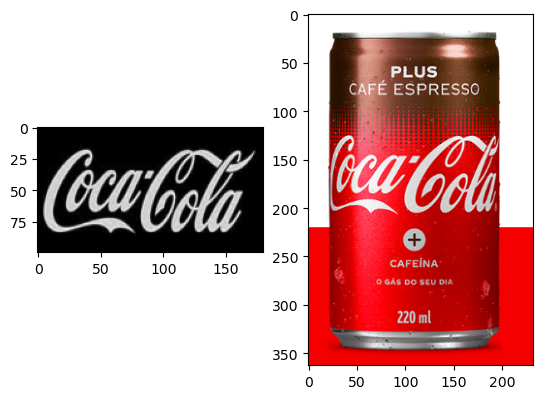

In [53]:
#Images to process
img_2 = cv.imread('./imgs/tp3/images/coca_logo_2.png')
img_pattern_2 = cv.resize(img_pattern, [180, 100])
img_pattern2 = cv.bitwise_not(img_pattern_2)

img_coca_logo_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_coca_logo_2_gray = cv.cvtColor(img_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern2, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_2)

[INFO] performing template matching...


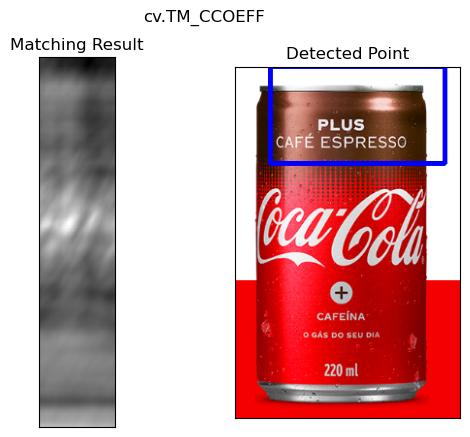

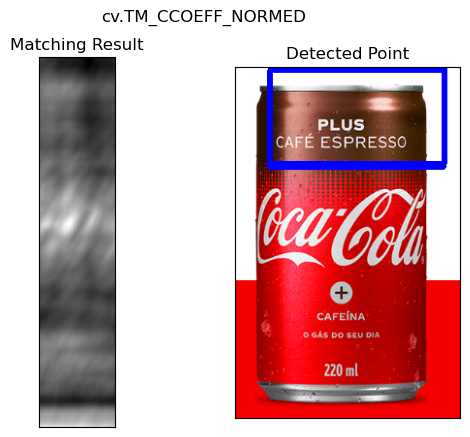

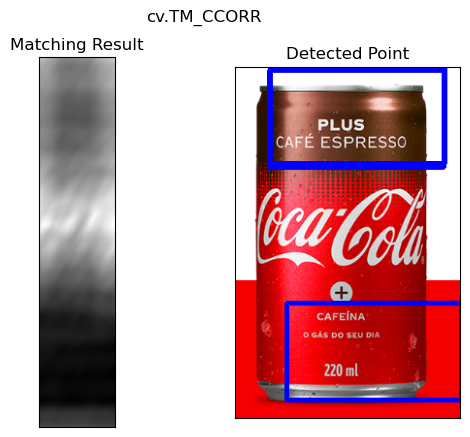

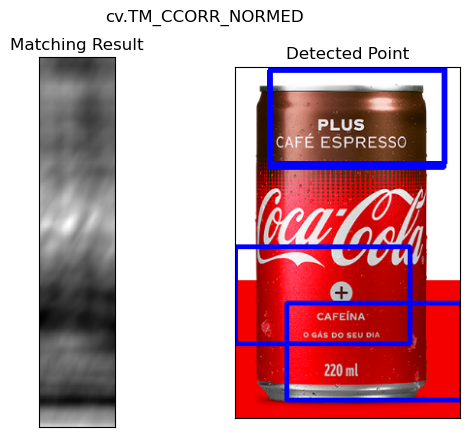

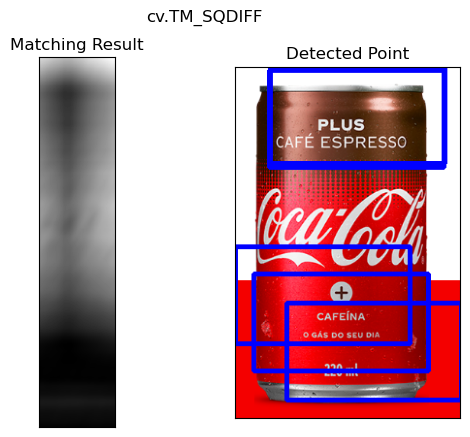

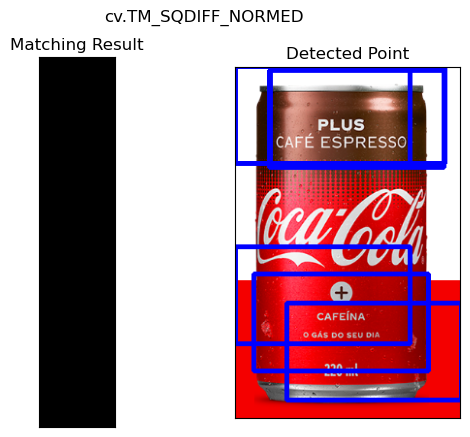

In [54]:
w, h = img_pattern_2.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img2 = img_coca_logo_2.copy()

    method = eval(m)
    #Aplicamos la coincidencia de patrones
    img_match_2 = cv.matchTemplate(img_coca_logo_2_gray, img_pattern2, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_match_2)

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = minLoc
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))

    cv.rectangle(img_coca_logo_2, top_left, bottom_rigth, (0, 0, 255), 3)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img_match_2,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Original image with bounding box
    plt.subplot(122),plt.imshow(img_coca_logo_2)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
    plt.suptitle(m)
    plt.show()

### Coca-cola multi

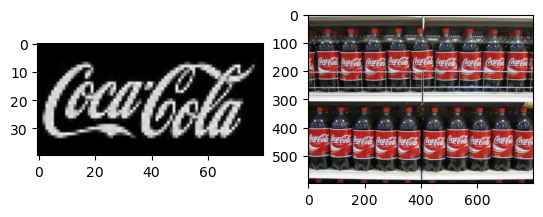

In [55]:
#Images to process
img_multi = cv.imread('./imgs/tp3/images/coca_multi.png')

# Resize dimensions of pattern image
img_pattern_multi = cv.bitwise_not(cv.resize(img_pattern, [80,40]))

img_coca_multi = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)
img_coca_multi_gray = cv.cvtColor(img_coca_multi, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_multi, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_multi)

[INFO] performing template matching...
(324, 553)
(404, 593)


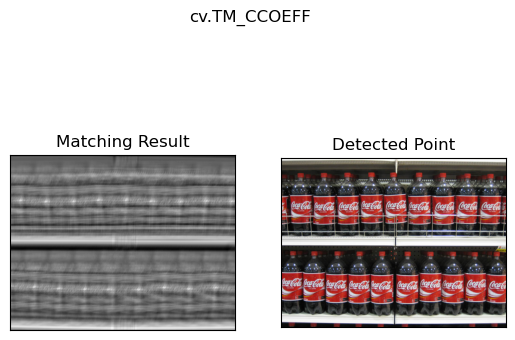

(32, 147)
(112, 187)


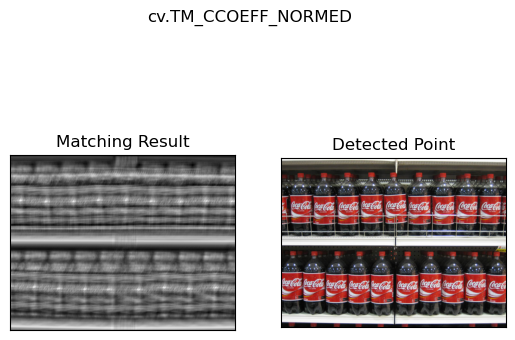

(528, 552)
(608, 592)


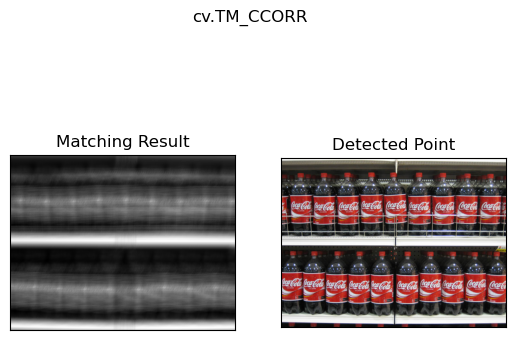

(32, 147)
(112, 187)


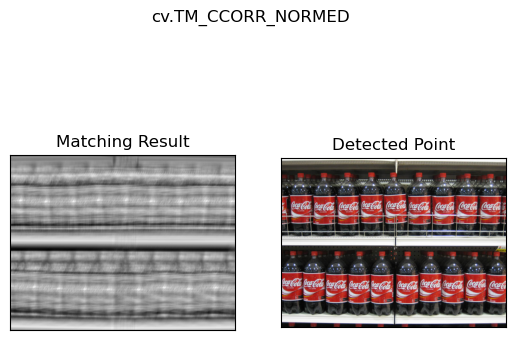

(520, 271)
(600, 311)


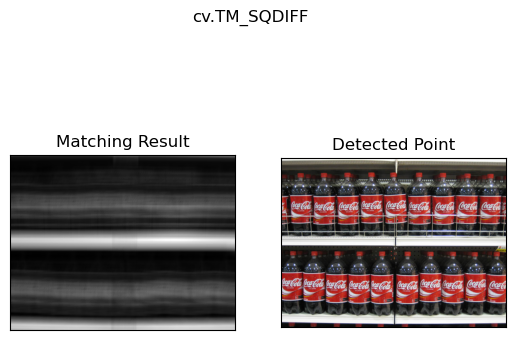

(0, 0)
(80, 40)


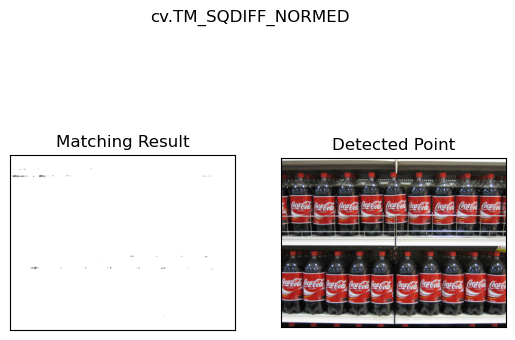

In [56]:
w, h = img_pattern_multi.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

#Aplicamos la coincidencia de patrones
for m in methods:
    img3 = img_coca_multi.copy()
    method = eval(m)
    img_multi_match = cv.matchTemplate(img_coca_multi_gray, img_pattern_multi,method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_multi_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))
    print(bottom_rigth)

    cv.rectangle(img3, top_left, bottom_rigth, (255, 0, 0), 2)

    # Results of matching
    plt.subplot(121),plt.imshow(img_multi_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img_coca_multi)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Retro 1

In [ ]:
#Images to process
img_3 = cv.imread('./imgs/tp3/images/coca_retro_1.png', 0)

img_coca_retro_1 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_coca_retro_1_gray = cv.cvtColor(img_coca_retro_1, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_1)

In [ ]:
w, h = img_pattern.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

#Aplicamos la coincidencia de patrones
for m in methods:
    img3 = img_coca_retro_1.copy()
    method = eval(m)
    img3_match = cv.matchTemplate(img_coca_retro_1_gray, img_pattern,method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img3_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))
    print(bottom_rigth)

    cv.rectangle(img3, top_left, bottom_rigth, (255, 0, 0), 2)

    # Results of matching
    plt.subplot(121),plt.imshow(img3_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img3)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Retro 2

In [ ]:
#Images to process
img_4 = cv.imread('./imgs/tp3/images/coca_retro_2.png')
img_pattern_4 = cv.resize(img_pattern, [140, 60])
img_pattern4 = cv.bitwise_not(img_pattern_4)

img_coca_retro_2 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_coca_retro_2_gray = cv.cvtColor(img_coca_retro_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern4, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_2)

In [ ]:
w, h = img_pattern_4.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img4 = img_coca_retro_2.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img4_match = cv.matchTemplate(img_coca_retro_2_gray, img_pattern4, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img4_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img4, top_left, bottom_rigth, (0, 0, 255), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img4_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img4)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Coca cola logo

In [ ]:
#Images to process
img_pattern_5 = cv.resize(img_pattern, [1200, 500])
img_pattern5 = cv.bitwise_not(img_pattern_5)
img_5 = cv.imread('./imgs/tp3/images/COCA-COLA-LOGO.jpg')

img_coca_cola_logo = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_coca_cola_logo_gray = cv.cvtColor(img_coca_cola_logo, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_5, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_5)

In [ ]:
w, h = img_pattern_5.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img5 = img_coca_cola_logo.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img5_match = cv.matchTemplate(img_coca_cola_logo_gray, img_pattern5, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img5_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img5, top_left, bottom_rigth, (0, 0, 255), 3)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img5_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img5)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Ejercicio 2

In [ ]:
img = cv.imread('./imgs/tp3/images/coca_multi.png')
img_coca_cola  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_coca_cola_gray = cv.cvtColor(img_coca_cola, cv.COLOR_BGR2GRAY)
img_template = cv.pyrDown(img_pattern_down)

w, h = img_template.shape[::-1]
res = cv.matchTemplate(img_coca_cola_gray,img_template,cv.TM_CCOEFF_NORMED)

# Fijamos un umbral de "coincidencia"
threshold = 0.35


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_coca_cola, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_template, cmap='gray')
plt.title('Pattern')

plt.subplot(122)
plt.imshow(img_coca_cola)
plt.title('Result')

#cv.imwrite('res.png',img_rgb)

### Ejercicio 3